# US HOUSEHOLD INCOME ANALYSIS

## Import required libraries and Load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('/content/transaction_dataset.csv')
data.head(200)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [4]:
data.shape

(9841, 51)

In [5]:
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

## Exploratory Data Analysis

In [7]:
data.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7

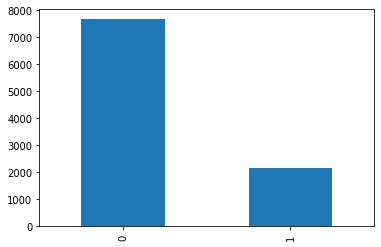

In [8]:
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")
bar_graph('FLAG')

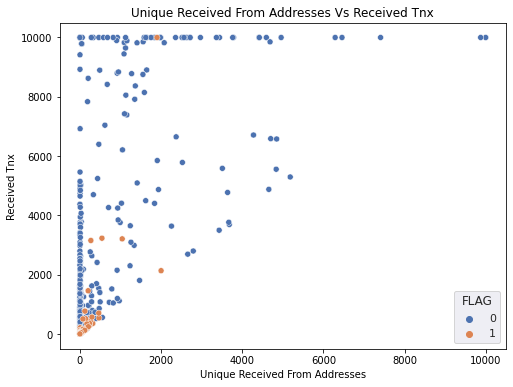

In [9]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'darkgrid')
sns.scatterplot(data = data,x = 'Unique Received From Addresses', y= 'Received Tnx',hue = 'FLAG' )
plt.title('Unique Received From Addresses Vs Received Tnx')
plt.show()

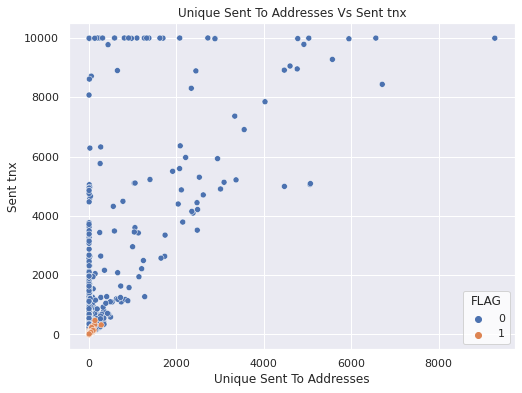

In [10]:
plt.subplots(figsize = (8, 6))
sns.set(style = 'whitegrid')
sns.scatterplot(data = data,x = 'Unique Sent To Addresses', y= 'Sent tnx',hue = 'FLAG' )
plt.title('Unique Sent To Addresses Vs Sent tnx')
plt.show()

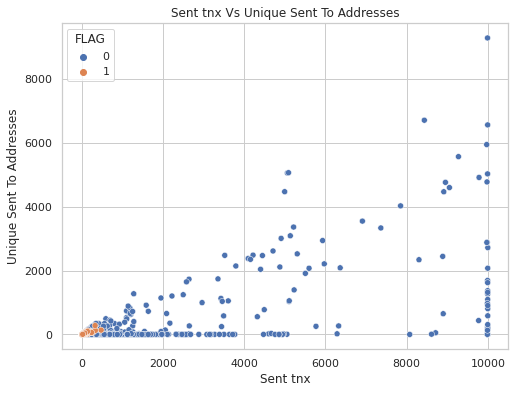

In [11]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = data,x = 'Sent tnx', y= 'Unique Sent To Addresses',hue = 'FLAG' )
plt.title('Sent tnx Vs Unique Sent To Addresses')
plt.show()

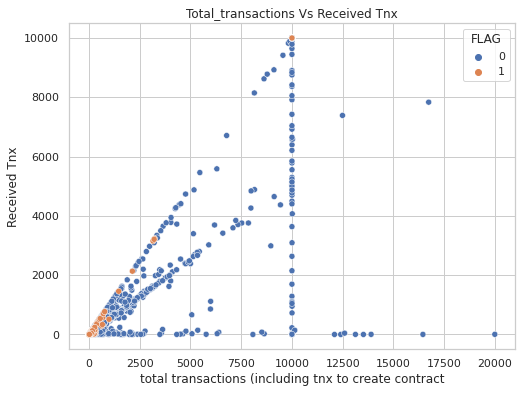

In [12]:
plt.subplots(figsize = (8, 6))
sns.scatterplot(data = data,x = 'total transactions (including tnx to create contract', y= 'Received Tnx',hue = 'FLAG' )
plt.title('Total_transactions Vs Received Tnx')
plt.show()

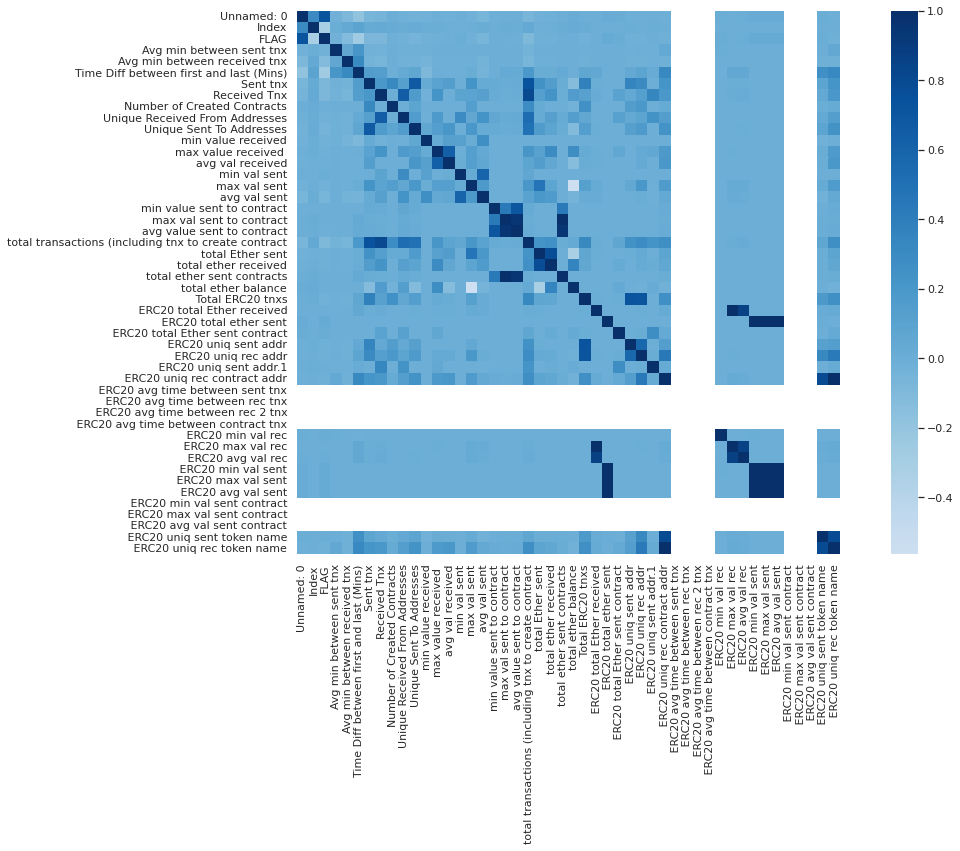

In [13]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),  annot=False, cmap='Blues', center=0, square=True)

In [14]:
# Dropping the unncessary columns
drop = ['Unnamed: 0', 'Index', 'Address','total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent',
        ' ERC20 uniq rec addr','min value sent to contract',' ERC20 uniq sent addr.1',]
data.drop(drop, axis=1, inplace=True)

In [15]:
data.shape

(9841, 26)

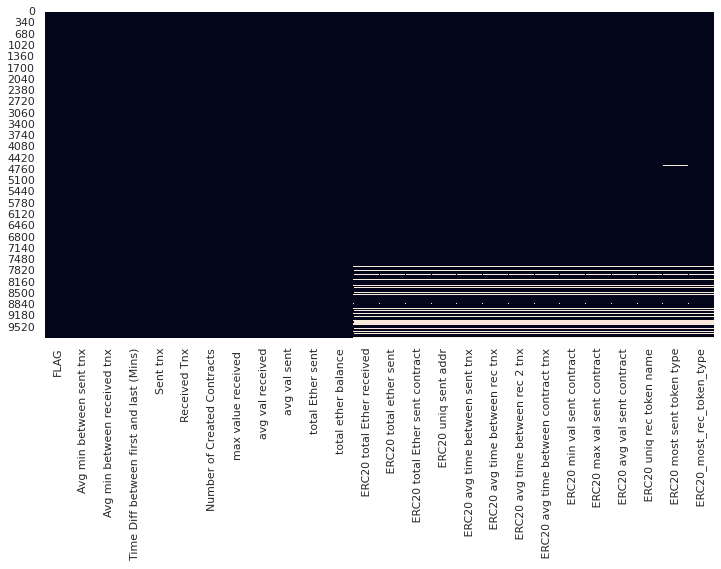

In [16]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

## Identify Input and Target columns

In [17]:
X = data.drop(columns=['FLAG'])
y = data['FLAG']

In [18]:
print(X.shape)
print(y.shape)

(9841, 25)
(9841,)


## Separating Numeric and Categorical columns

In [19]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist() #lists all the numeric columns.
categoric_cols = X.select_dtypes(include='object').columns.tolist() #lists all the categorical columns.

In [20]:
print(numeric_cols)

['Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'max value received ', 'avg val received', 'avg val sent', 'total Ether sent', 'total ether balance', ' ERC20 total Ether received', ' ERC20 total ether sent', ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract', ' ERC20 uniq rec token name']


In [21]:
print(categoric_cols)

[' ERC20 most sent token type', ' ERC20_most_rec_token_type']


## Handling Missing Data

In [22]:
X[numeric_cols].isna().sum()

Avg min between sent tnx                     0
Avg min between received tnx                 0
Time Diff between first and last (Mins)      0
Sent tnx                                     0
Received Tnx                                 0
Number of Created Contracts                  0
max value received                           0
avg val received                             0
avg val sent                                 0
total Ether sent                             0
total ether balance                          0
 ERC20 total Ether received                829
 ERC20 total ether sent                    829
 ERC20 total Ether sent contract           829
 ERC20 uniq sent addr                      829
 ERC20 avg time between sent tnx           829
 ERC20 avg time between rec tnx            829
 ERC20 avg time between rec 2 tnx          829
 ERC20 avg time between contract tnx       829
 ERC20 min val sent contract               829
 ERC20 max val sent contract               829
 ERC20 avg va

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(data[numeric_cols])
X[numeric_cols] = imputer.transform(X[numeric_cols])

In [24]:
X[numeric_cols].isna().sum()

Avg min between sent tnx                   0
Avg min between received tnx               0
Time Diff between first and last (Mins)    0
Sent tnx                                   0
Received Tnx                               0
Number of Created Contracts                0
max value received                         0
avg val received                           0
avg val sent                               0
total Ether sent                           0
total ether balance                        0
 ERC20 total Ether received                0
 ERC20 total ether sent                    0
 ERC20 total Ether sent contract           0
 ERC20 uniq sent addr                      0
 ERC20 avg time between sent tnx           0
 ERC20 avg time between rec tnx            0
 ERC20 avg time between rec 2 tnx          0
 ERC20 avg time between contract tnx       0
 ERC20 min val sent contract               0
 ERC20 max val sent contract               0
 ERC20 avg val sent contract               0
 ERC20 uni

## Scaling Numeric columns(Data Normalization)

- Scaling your variables to make them equivalent, and thus your ML model performance would not be impacted by an underlying bias towards the larger variables.

In [25]:
X[numeric_cols].describe().loc[['min', 'max']]

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq rec token name
min,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0000,0.0,0.00,-15605352.04,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,430287.67,482175.49,1954860.95,10000.0,10000.0,9995.0,800000.0,283618.8316,12000.0,28580960.89,14288636.26,1.000020e+12,1.120000e+11,416000.0,6582.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737.0


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data[numeric_cols])
X[numeric_cols] = scaler.transform(X[numeric_cols])

In [27]:
X[numeric_cols].describe().loc[['min', 'max']]

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq rec token name
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Encoding Caategorical Columns

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(data[categoric_cols])
encoded_cols = list(encoder.get_feature_names(categoric_cols))
X[encoded_cols] = encoder.transform(X[categoric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [29]:
X = X[numeric_cols + encoded_cols]

In [30]:
print(X.shape)

(9841, 797)


## Splitting the data into Train and Test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7872, 797)
(1969, 797)
(7872,)
(1969,)


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [34]:
print(X_train.shape)
print(X_test.shape)

(7872, 431)
(1969, 431)


## Model Building and Prediction

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [36]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('GradientBoostingClassifier',XGBClassifier()))

In [37]:
model_names = []
model_score = []
for name,model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    model_names.append(name)
    model_score.append(accuracy_score(predictions, y_test))

In [38]:
report = pd.DataFrame({'Models':model_names, 'Accuracy_Score':model_score})
report

,Models,Accuracy_Score
0,Logistic Regression,0.985272
1,DecisionTreeClassifier,0.981717
2,RandomForestClassifier,0.985780
3,GradientBoostingClassifier,0.986287


In [39]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier()

In [40]:
preds = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1504
           1       0.99      0.95      0.97       465

    accuracy                           0.99      1969
   macro avg       0.99      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969



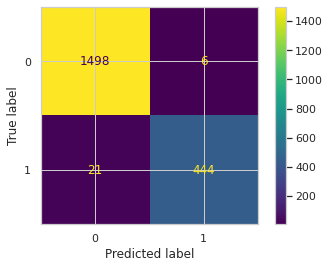

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)